In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 그래프에서 한글표현을 위해 폰트를 설치
# %config InlineBackend.figure_format = 'retina'       # 폰트가 깨끗하게 보이도록 설정
# !apt-get -qq -y install fonts-nanum > /dev/null      # 나눔 폰트 설치

import matplotlib.font_manager as fm
# 기본 글꼴 변경
mpl.pyplot.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

In [2]:
# 데이터 로딩
def read_data(filename, encoding='cp949'):                # 읽기 함수 정의
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]                 # txt 파일의 헤더(id document label)는 제외하기
  return data

def write_data(data, filename, encoding='cp949'):         # 쓰기 함수도 정의
  with open(filename, 'w', encoding=encoding) as f:
    f.write(data)

#data = read_data('/content/gdrive/My Drive/pytest/ratings_small.txt', encoding='cp949')
data = read_data('C:\\Users\\jye12\\Python\\file\\pytest/ratings_small.txt', encoding='cp949')  # 전체파일은 ratings.txt (긍정 1만, 부정 1만)

In [3]:
# 데이터 확인
print(data)
print(len(data))
print(len(data[0])) 
print(data[0])
print(data[0:3])

[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'], ['8132799', '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."', '1'], ['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1'], ['9251303', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '1'], ['10067386', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.', '1'], ['2190435', '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화', '1'], ['9279041', '완전 감동입니다 다시봐도 감동', '1'], ['7865729', '개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음', '1'], ['7477618', '굿', '1'], ['9250537', '바보가 아니라 병 쉰 인듯', '1'], ['9730759', '내 나이와 같은 영화를 지금 본 나는 감동적이다..하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다...', '1'], ['640794', '재밌다', '1'], ['9537008', '고질라니무 귀엽다능ㅋㅋ', '1'], ['4911311', '영화의 오페라화라고 해야할 작품. 극단적 평갈림은 어쩔 수 없는 듯.', '1'], ['6686673', '3도 반전 좋았제 ^^', '1'], ['9034036', '평점 왜 낮아? 긴장감 스릴감 진짜 최고인데 진짜 전장에서 느끼는 공포를 생생하게 전해준다.', '1'], ['979683', '네고시에이터랑 소재만 같을 뿐.. 아무런 관련없음..', '1'], ['165498', '단연 최고', '1'], ['8703997', '가면 갈수록 더욱 빠져드

In [4]:
# 샘플 데이터 분석 연습

import rhinoMorph
rn = rhinoMorph.startRhino()
# 형태소 분석된 문장 샘플 보기
sample_data = rhinoMorph.onlyMorph_list(rn, data[0][1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR',
                                                             'IC', 'MM', 'MAG', 'MAJ'], eomi=True)

print('sample data:', sample_data)				            # 형태소 분석 결과
print('joined sample data:', ' '.join(sample_data))	  # 문자열을 공백으로 연결한다

filepath:  C:\Users\jye12\anaconda\lib\site-packages
classpath:  C:\Users\jye12\anaconda\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!
sample data: ['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ']
joined sample data: 어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ


In [5]:
# 전체 데이터 형태소 분석

morphed_data = ''
for data_each in data:
  morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
  joined_data_each = ' '.join(morphed_data_each)			        # 문자열을 하나로 연결
  if joined_data_each:                                      	# 내용이 있는 경우만 저장하게 함
    morphed_data += data_each[0]+"\t"+joined_data_each+"\t"+data_each[2]+"\n"
    
# 형태소 분석된 파일 저장
write_data(morphed_data, 'ratings_morphed.txt', encoding='cp949')

In [6]:
print(morphed_data)

8112052	어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ	1
8132799	디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사	1
4655635	폴리스스토리 시리즈 뉴 없다 최고	1
9251303	와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화	1
10067386	안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화	1
2190435	사랑 해보다 사람 처음 끝 웃다 있다 영화	1
9279041	완전 감동 다시다 감동	1
7865729	개들 전쟁 나오다 나오다 1빠 보다	1
7477618	굿	1
9250537	바보 병	1
9730759	나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다	1
640794	재미있다	1
9537008	고질라 무 귀엽다 ㅋㅋ	1
4911311	영화 오페라 작품 극단적 평 갈리다 어쩌다 없다	1
6686673	반전 좋다 ^^	1
9034036	평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다	1
979683	네고시에이터 소재 같다 아무런 관련 없다	1
165498	단연 최고	1
8703997	가다 갈수록 더욱 빠지다 밀회 화이팅	1
9468781	어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품	1
5185638	오랜만 보다 제대로 되다 범죄 스릴러	1
10221267	그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남은 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태	1
486781	마지막 씬 잊다 없다	1
7776793	강압적 용서 세뇌 용서 대하다 비판	1
9694764	중세 시대 명작 굿 평점 왜 이러하다	1
10232169	시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지

In [7]:
# 분석된 데이터 로딩

data = read_data('ratings_morphed.txt', encoding='cp949')
print(len(data))                              # 일부는 내용이 남지 않아 제외 됨
print(len(data[0]))                           # 3개의 컬럼

data_text = [line[1] for line in data]      	# 데이터 본문
data_senti = [line[2] for line in data]     	# 데이터 긍부정 부분 (1은 긍정, 0은 부정)

494
3


In [8]:
# counter 연습
from collections import Counter
count = Counter(["여름", "과일", "딸기", "과일", "딸기"])
result = count.most_common(2)

print(result)
print(result[0])
print(result[0][0])		# 0 번째 요소의 0 번째
print(result[0][1])		# 0 번째 요소의 1 번째

[('과일', 2), ('딸기', 2)]
('과일', 2)
과일
2


In [9]:
# 분석된 데이터 빈도 구하기
print('data_text:', data_text)

mergedText = ' '.join(data_text)         	# 좋은 방법. 공백을 추가하며 모든 리스트 요소들을 결합한다
print('mergedText:', mergedText)

mergedTextList = mergedText.split(' ')   	# 결합된 요소들을 공백 단위로 분리하여 하나의 리스트로 만든다
print('mergedTextList:', mergedTextList)

wordInfo = Counter(mergedTextList)  	    # 하나의 리스트로 결합된 요소를 카운트한다 (내림차순)
print('wordInfo:', wordInfo)

data_text: ['디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사', '폴리스스토리 시리즈 뉴 없다 최고', '와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화', '안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화', '사랑 해보다 사람 처음 끝 웃다 있다 영화', '완전 감동 다시다 감동', '개들 전쟁 나오다 나오다 1빠 보다', '굿', '바보 병', '나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다', '재미있다', '고질라 무 귀엽다 ㅋㅋ', '영화 오페라 작품 극단적 평 갈리다 어쩌다 없다', '반전 좋다 ^^', '평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다', '네고시에이터 소재 같다 아무런 관련 없다', '단연 최고', '가다 갈수록 더욱 빠지다 밀회 화이팅', '어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품', '오랜만 보다 제대로 되다 범죄 스릴러', '그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남은 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태', '마지막 씬 잊다 없다', '강압적 용서 세뇌 용서 대하다 비판', '중세 시대 명작 굿 평점 왜 이러하다', '시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작', '사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화나다', '인간 잠재 되다 악마 여러 시간 공간 속 존속 이 다큐 엉뚱 광적 재현', '최고 일 동안 쉬다 틈틈이 잠 줄이다 여운 남다', '실화 더욱 충격 다시 일어나다 서다 안되다 경각심 일깨우다 영화', '존 그라다 샴 작품 한 보다

In [10]:
# sorted 연습
sample = {'여름':1, '과일':2, '딸기':3}

print(sorted(sample))
print(sorted(sample, reverse=True))                     # 역순으로 정렬한다
print(sorted(sample, key=sample.get, reverse=True))     # sample.get의 출력된 값을 기준으로 sample을 정렬한다

print(sorted(sample.values(), reverse=True))

['과일', '딸기', '여름']
['여름', '딸기', '과일']
['딸기', '과일', '여름']
[3, 2, 1]


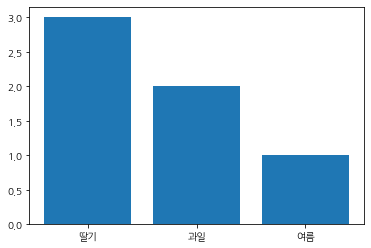

In [11]:
# bar 그래프 연습
wordInfo_sample = Counter({'여름':1, '과일':2, '딸기':3})
sorted_keys_sample = sorted(wordInfo_sample, key=wordInfo_sample.get, reverse=True)
sorted_values_sample = sorted(wordInfo_sample.values(), reverse=True)
plt.rc('font',family='NanumGothic')
import matplotlib.pyplot as plt
plt.bar(range(len(wordInfo_sample)), sorted_values_sample)	  # X축의 위치, 각 x의 높이
plt.xticks(range(len(wordInfo_sample)), sorted_keys_sample)  	# X축의 위치, 각 x의 라벨
plt.show()

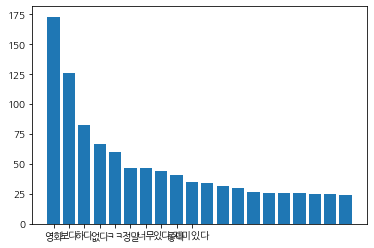

In [12]:
# 앞에서 20개까지만 출력
sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(10), sorted_keys[:10])
plt.show()

In [13]:
# data_text는 각 문장을 리스트 원소로 담고 있다 
# 각 문장 리스트 원소는 공백으로 분리되어 있다
print(data_text)

['디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사', '폴리스스토리 시리즈 뉴 없다 최고', '와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화', '안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화', '사랑 해보다 사람 처음 끝 웃다 있다 영화', '완전 감동 다시다 감동', '개들 전쟁 나오다 나오다 1빠 보다', '굿', '바보 병', '나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다', '재미있다', '고질라 무 귀엽다 ㅋㅋ', '영화 오페라 작품 극단적 평 갈리다 어쩌다 없다', '반전 좋다 ^^', '평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다', '네고시에이터 소재 같다 아무런 관련 없다', '단연 최고', '가다 갈수록 더욱 빠지다 밀회 화이팅', '어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품', '오랜만 보다 제대로 되다 범죄 스릴러', '그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남은 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태', '마지막 씬 잊다 없다', '강압적 용서 세뇌 용서 대하다 비판', '중세 시대 명작 굿 평점 왜 이러하다', '시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작', '사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화나다', '인간 잠재 되다 악마 여러 시간 공간 속 존속 이 다큐 엉뚱 광적 재현', '최고 일 동안 쉬다 틈틈이 잠 줄이다 여운 남다', '실화 더욱 충격 다시 일어나다 서다 안되다 경각심 일깨우다 영화', '존 그라다 샴 작품 한 보다 가치 있다', '농

In [14]:
             # 만약 워드클라우드 패키지가 없다고 나오면 이를 설치한다
from wordcloud import WordCloud

In [38]:
import matplotlib.pyplot as plt

from matplotlib import font_manager

font_fname = "C:/Windows/Fonts/malgun.ttf"

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

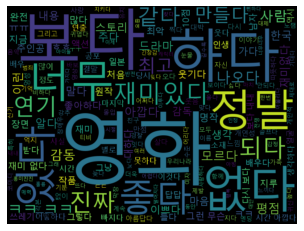

In [39]:
cloud = WordCloud(font_path=font_fname, width=800, height=600).generate(" ".join(data_text))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

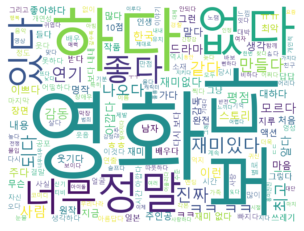

In [40]:
# 워드 클라우드 배경 바꾸기
cloud = WordCloud(font_path=font_fname, width=800, height=600, background_color='white').generate(" ".join(data_text))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip list